In [2]:
%matplotlib inline
# Import some useful packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# For data preprocessing
from tensorflow.keras.utils import to_categorical

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [4]:
df = pd.read_csv('final_data.csv')
info = pd.read_csv('info.csv')

In [3]:
info.groupby('position').count()

,Unnamed: 0,summoner_a,summoner_b,win_rate,lane_kill_rate,kda,kill_participate,damage
position,,,,,,,,
0,2141,2141,2141,2141,2141,2141,2141,2141
1,1453,1453,1453,1453,0,1453,1453,1453
2,2148,2148,2148,2148,2148,2148,2148,2148
4,1446,1446,1446,1446,1446,1446,1446,0


In [5]:
df

,top_win_rate,top_lane_kill_rate,top_kda,top_kill_participate,top_damage,jg_win_rate,jg_kda,jg_kill_participate,jg_damage,mid_win_rate,mid_lane_kill_rate,mid_kda,mid_kill_participate,mid_damage,adc_win_rate,adc_lane_kill_rate,adc_kda,adc_kill_participate,adc_damage,sup_win_rate,sup_lane_kill_rate,sup_kda,sup_kill_participate,result
0,0.5165,0.5350,0.571429,0.529851,0.549520,0.5069,0.485660,0.489531,0.509276,0.5049,0.3311,0.498000,0.478177,0.483146,0.4960,0.5816,0.513333,0.509784,0.471470,0.5351,0.4985,0.436229,0.491745,1.0
1,0.4714,0.3487,0.412346,0.453865,0.452230,0.4895,0.532632,0.514573,0.510004,0.4417,0.3462,0.468085,0.495984,0.466570,0.5135,0.4670,0.507605,0.500000,0.539221,0.4857,0.5645,0.551515,0.512987,1.0
2,0.4194,0.5431,0.507246,0.521191,0.513936,0.5064,0.474645,0.526022,0.606890,0.4816,0.5345,0.471739,0.460512,0.405302,0.5248,0.4753,0.513684,0.503891,0.458632,0.5009,0.4878,0.451220,0.470395,1.0
3,0.5190,0.5149,0.500000,0.502481,0.556929,0.4197,0.441296,0.496496,0.430142,0.4943,0.6710,0.472000,0.500000,0.475375,0.5266,0.5789,0.508539,0.487562,0.496394,0.4602,0.5369,0.428037,0.520788,1.0
4,0.4881,0.5154,0.413146,0.467259,0.528237,0.4782,0.498069,0.505174,0.454369,0.5183,0.5476,0.509890,0.497000,0.491839,0.5049,0.5293,0.496109,0.509146,0.442267,0.5073,0.4807,0.507853,0.493318,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,0.4355,0.6879,0.508861,0.490074,0.490373,0.4798,0.509690,0.509728,0.423939,0.4874,0.7543,0.521649,0.502020,0.458484,0.5062,0.4594,0.486381,0.489712,0.462690,0.4563,0.5780,0.420345,0.443067,1.0
18278,0.5347,0.5320,0.470423,0.495856,0.540506,0.5029,0.519157,0.513983,0.562910,0.4780,0.5316,0.419355,0.469595,0.451341,0.4737,0.4553,0.496842,0.507692,0.547123,0.5026,0.6534,0.465753,0.449532,0.0
18279,0.3684,0.3871,0.334056,0.469333,0.405582,0.4860,0.502879,0.506616,0.456211,0.4889,0.2952,0.475104,0.488449,0.453055,0.5180,0.6372,0.576238,0.530550,0.503203,0.5084,0.5130,0.518591,0.522404,0.0
18280,0.5982,0.7423,0.588785,0.516005,0.438540,0.5061,0.537190,0.518443,0.541791,0.4082,0.3530,0.389273,0.463208,0.506320,0.5026,0.4902,0.472165,0.477581,0.491471,0.5124,0.6006,0.453901,0.501152,1.0


In [5]:
x_train = df[df.columns[0:-1]]
y_train = df["result"]

In [6]:
df.groupby('result').count()

,top_win_rate,top_lane_kill_rate,top_kda,top_kill_participate,top_damage,jg_win_rate,jg_kda,jg_kill_participate,jg_damage,mid_win_rate,...,mid_damage,adc_win_rate,adc_lane_kill_rate,adc_kda,adc_kill_participate,adc_damage,sup_win_rate,sup_lane_kill_rate,sup_kda,sup_kill_participate
result,,,,,,,,,,,,,,,,,,,,,
0.0,9057,9057,9057,9057,9057,9057,9057,9057,9057,9057,...,9057,9057,9057,9057,9057,9057,9057,9057,9057,9057
1.0,9225,9225,9225,9225,9225,9225,9225,9225,9225,9225,...,9225,9225,9225,9225,9225,9225,9225,9225,9225,9225


In [7]:
y_train.shape

(18282,)

In [8]:
y_train = to_categorical(y_train, 2)

In [9]:
y_train[1003]

array([0., 1.], dtype=float32)

In [10]:
FC_layers = [Dense(units=256, input_dim=23, activation='relu'),
             Dense(units=128, activation = 'relu'),
             Dense(units=2, activation='softmax')]

In [11]:
model = Sequential(FC_layers)
# model.add(Dense(87, input_dim=784, activation='relu'))
# model.add(Dense(128,activation = 'relu'))
# model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 39,298
Trainable params: 39,298
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mse', optimizer=SGD(lr=0.005), metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, batch_size=50, epochs=50, validation_split = 1/6)

Train on 15235 samples, validate on 3047 samples
Epoch 1/50
15235/15235 [==============================] - 1s 98us/sample - loss: 0.2502 - accuracy: 0.5008 - val_loss: 0.2501 - val_accuracy: 0.4985
Epoch 2/50
15235/15235 [==============================] - 1s 45us/sample - loss: 0.2501 - accuracy: 0.4979 - val_loss: 0.2500 - val_accuracy: 0.5064
Epoch 3/50
15235/15235 [==============================] - 1s 47us/sample - loss: 0.2501 - accuracy: 0.5000 - val_loss: 0.2501 - val_accuracy: 0.4933
Epoch 4/50
15235/15235 [==============================] - 1s 44us/sample - loss: 0.2501 - accuracy: 0.5016 - val_loss: 0.2501 - val_accuracy: 0.4874
Epoch 5/50
15235/15235 [==============================] - 1s 48us/sample - loss: 0.2500 - accuracy: 0.4989 - val_loss: 0.2501 - val_accuracy: 0.5120
Epoch 6/50
15235/15235 [==============================] - 1s 47us/sample - loss: 0.2501 - accuracy: 0.4994 - val_loss: 0.2500 - val_accuracy: 0.5051
Epoch 7/50
15235/15235 [==============================] -

In [14]:
# model.save('model1.h5')

### 畫圖分析

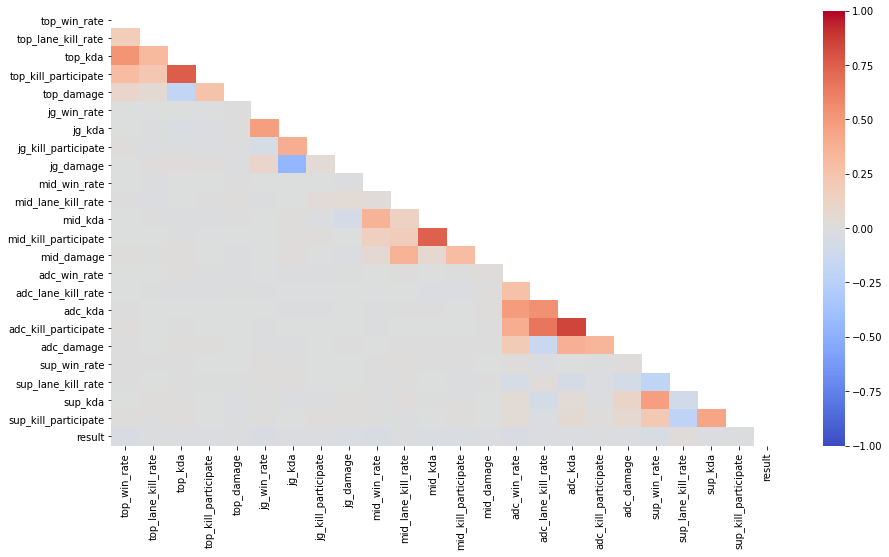

In [16]:
plt.figure(figsize=(15,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

In [ ]:
# 從上圖發現的有趣現象
# Jg damage 跟 Jg kda呈負相關 JG地的擊殺多半是搶頭
#Support的 Lane kill rate會導致 自己的 win rate下降  代表搶自己AD的人頭的確可能降低勝率
# AD 和 Support的數據彼此較有關連  其他位置彼此間則沒有太大關係  跟預期符合

### 主成分分析

In [17]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [18]:
df2 = preprocessing.scale(df)

In [37]:
pca = PCA(n_components=5)
pca.fit(df2)
score = pca.transform(df2)

In [44]:
print(pca.explained_variance_ratio_)

[0.11539078 0.09375594 0.08634424 0.07870789 0.07074697]


In [43]:
pca_result = pd.concat((pd.DataFrame(df.iloc[:, 0:-1].columns, columns = ['Variable']), 
                pd.DataFrame(abs(pca.components_.T), columns = ['PC1','PC2','PC3','PC4','PC5'])), 
                axis = 1).sort_values(by='PC1', ascending = False)

pca_result.reset_index().drop(["index"],axis=1)

,Variable,PC1,PC2,PC3,PC4,PC5
0,adc_kda,0.556146,0.008445,0.007096,0.018786,0.007818
1,adc_kill_participate,0.555757,0.007801,0.001885,0.071324,0.009613
2,adc_lane_kill_rate,0.415429,0.021320,0.027140,0.156015,0.000219
3,adc_win_rate,0.375053,0.001828,0.017028,0.033139,0.010079
4,adc_damage,0.246727,0.012684,0.025724,0.135112,0.007483
5,sup_lane_kill_rate,0.049186,0.007473,0.029353,0.306620,0.022290
6,sup_kill_participate,0.047142,0.022880,0.038412,0.495168,0.046365
7,sup_kda,0.032523,0.022554,0.052104,0.577594,0.042578
8,NaN,0.024645,0.029126,0.056237,0.037776,0.034673
9,jg_kda,0.017007,0.058722,0.040906,0.070154,0.727815


In [45]:
#從主成分分析可以看出在這個版本中整個遊戲的影響力有  AD > TOP > MID > SUP > JG 的趨勢 而且影響力落差最大的地方是AD

### 隨機森林

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [46]:
X = df[df.columns[0:-1]]
Y = df["result"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

0.5250022264666616 481


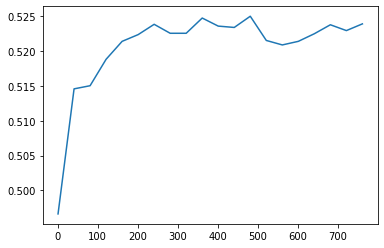

In [20]:
# scorel =[]
# for i in range(0,800,40):
#     rfc = RandomForestClassifier(n_estimators=i+1,
#                                     n_jobs=1,
#                                     random_state=10
#                                 )
#     score = cross_val_score(rfc, x_train, y_train, cv=5).mean()
#     scorel.append(score)
# print(max(scorel),(scorel.index(max(scorel))*40)+1)
# plt.plot(range(1,801,40), scorel)

In [37]:
rfc = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=10)
rfc = rfc.fit(x_train,y_train)
train_score = rfc.score(x_train, y_train)
test_score = rfc.score(x_test, y_test)
print('R^2 Training Score:{}'.format(train_score),'R^2 Validation Score:{}'.format(test_score))

# print()
# rfc.feature_importances_

rfc_result = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                pd.DataFrame(rfc.feature_importances_.T, columns = ['Importance'])), 
                axis = 1).sort_values(by='Importance', ascending = False)

rfc_result.reset_index().drop(["index"],axis=1)

R^2 Training Score:0.9864856168350602 R^2 Validation Score:0.5038279256288735


,Variable,Importance
0,top_win_rate,0.047013
1,mid_kill_participate,0.046412
2,mid_win_rate,0.046094
3,mid_kda,0.045782
4,top_kill_participate,0.045490
5,mid_damage,0.045343
6,mid_lane_kill_rate,0.045275
7,sup_win_rate,0.045273
8,top_lane_kill_rate,0.044880
9,sup_kill_participate,0.044622


### 羅吉斯回歸

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
lr= LogisticRegression(C=5,
                        n_jobs=1,
                        random_state=22,
                        class_weight='balanced'
                        )
lr.fit(x_train, y_train)
# Scoring
train_score = cross_val_score(lr, x_train, y_train, cv=10).mean()
test_score = lr.score(x_test, y_test)
print('R^2 Training Score:{}'.format(train_score),'R^2 Validation Score:{}'.format(test_score))

R^2 Training Score:0.5324016869412878 R^2 Validation Score:0.5370032810791104


In [49]:
print(lr.intercept_)

lr_result = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                pd.DataFrame(lr.coef_.T, columns = ['Coefficient']),
                pd.DataFrame(abs(lr.coef_.T), columns = ['Importance'])), 
                axis = 1).sort_values(by='Importance', ascending = False)

lr_result.reset_index().drop(["index"],axis=1)

[7.01873807]


,Variable,Coefficient,Importance
0,sup_win_rate,-2.503850,2.503850
1,adc_win_rate,-2.399991,2.399991
2,jg_kda,-2.075097,2.075097
3,mid_win_rate,-1.531048,1.531048
4,top_win_rate,-1.430117,1.430117
5,jg_damage,-1.375637,1.375637
6,adc_damage,-1.208905,1.208905
7,adc_kill_participate,1.168303,1.168303
8,mid_damage,-0.864718,0.864718
9,adc_lane_kill_rate,-0.821088,0.821088
